# **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# **Load Dataset**

In [10]:
# Load the dataset
file_path = "C:\\Users\\ACDC\\Desktop\\techem\\assignment2\\energy+efficiency\\ENB2012_data.xlsx"
data = pd.read_excel(file_path)

# Display first few rows of the dataset
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# **Preprocess Data**

In [12]:
# Select the features and target variable
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = data['Y1']  # Heating Load

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Handle missing values if any (here, we drop rows with missing values)
X = X.dropna()
y = y.dropna()

# Split the data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features (important for regularized models like Ridge)
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_val_scaled = scalerX.transform(X_val)
X_test_scaled = scalerX.transform(X_test)

# Normalize the target variable
scalery = StandardScaler()
y_train_scaled = scalery.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scalery.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scalery.transform(y_test.values.reshape(-1, 1))


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64
0


# **Train Multiple Linear Regression (MLR)**

In [15]:
# Train a basic Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set
y_val_pred_scaled = lr_model.predict(X_val_scaled)

# Evaluate performance on the validation set
mse_lr = mean_squared_error(y_val_scaled, y_val_pred_scaled)
r2_lr = r2_score(y_val_scaled, y_val_pred_scaled)

print(f"Linear Regression Model Performance (Validation):")
print(f"R²: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")


Linear Regression Model Performance (Validation):
R²: 0.8750
MSE: 0.1325


# **Train Ridge Regression Model with Cross-Validation on Regularization Parameter (α)**

In [19]:
# Experiment with different values of alpha (regularization strength)
alphas = np.logspace(-5, 5, 10)  # 10 values ranging from 10^-5 to 10^5
best_alpha = None
best_r2 = -np.inf
best_model_ridge = None

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train_scaled)
    y_val_pred_ridge_scaled = ridge_model.predict(X_val_scaled)
    r2 = r2_score(y_val_scaled, y_val_pred_ridge_scaled)
    
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_model_ridge = ridge_model

# Evaluate the best Ridge model
print(f"Best Ridge Model (α = {best_alpha}):")
print(f"R² on Validation Data: {best_r2:.4f}")


Best Ridge Model (α = 1e-05):
R² on Validation Data: 0.9050


# **Final Model Evaluation on Test Data**

Final Evaluation on Test Data (Ridge Model):
R²: 0.9196
MSE: 0.0784


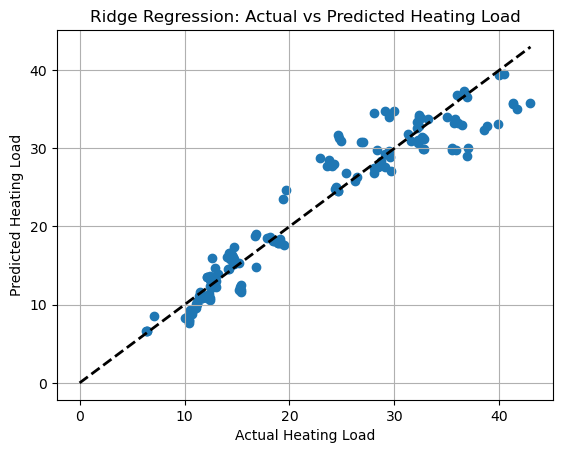

In [24]:
# Predict on the test set using the best Ridge model
y_test_pred_scaled = best_model_ridge.predict(X_test_scaled)

# Evaluate on the test set
mse_test = mean_squared_error(y_test_scaled, y_test_pred_scaled)
r2_test = r2_score(y_test_scaled, y_test_pred_scaled)

# Transform predictions back to the original scale
y_test_pred = scalery.inverse_transform(y_test_pred_scaled)
y_test_actual = scalery.inverse_transform(y_test_scaled)

print(f"Final Evaluation on Test Data (Ridge Model):")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")

# Ensure y_test_actual and y_test_pred are 1D
y_test_actual = y_test_actual.flatten()
y_test_pred = y_test_pred.flatten()

# Plot Actual vs Predicted values for the test data
plt.scatter(y_test_actual, y_test_pred)
plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], 'k--', lw=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Ridge Regression: Actual vs Predicted Heating Load')
plt.grid(True)
plt.show()

